In [1]:
from hyperdash import monitor_cell

In [2]:
import gym
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
env = gym.make('FrozenLake-v0')

[2017-07-18 18:47:07,772] Making new env: FrozenLake-v0


In [5]:
print(env.observation_space)
q_table = np.zeros([env.observation_space.n, env.action_space.n])

Discrete(16)


In [6]:
LR = 0.8
Y = 0.95
NUM_EPISODES = 2000

In [7]:
%%monitor_cell FrozenLake Q-table
rList = []
cList = []
for i in range(NUM_EPISODES):
    s = env.reset()
    rAll = 0
    d = False
    j = 0
    change = []
    while j < 99:
        j+=1
        random = np.random.randn(1, env.action_space.n) *(1./(i+1))
        a = np.argmax(q_table[s,:] + random)
        # s1 is observation, r is reward
        s1, r, done, _ = env.step(a)
        bef = q_table[s,a]
        q_table[s,a] = q_table[s,a] + LR*(r + Y*np.max(q_table[s1,:]) - q_table[s,a])
        aft = q_table[s,a]
        delt = bef - aft
        perc = min(round(abs((delt)/bef)*100), 300) # cap at 300% to avoid breaking the mean
        change.append(perc)
        
#         print("Bef",bef,"aft", aft, "delt", delt, "%", perc)

        rAll += r

        s = s1
        if done:
            break
    rList.append(rAll)
    cList.append(np.mean(change))
print "Score over time: " +  str(sum(rList)/NUM_EPISODES)

/home/paperspace/anaconda2/envs/p27/lib/python2.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
/home/paperspace/anaconda2/envs/p27/lib/python2.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in double_scalars


Score over time: 0.4295


Final Q-Table Values


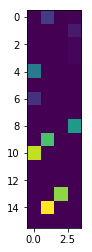

[[  0.00000000e+00   1.77225081e-01   3.06914288e-03   6.08194891e-03]
 [  4.76166737e-04   1.48318226e-04   2.88896276e-03   7.30156695e-02]
 [  9.28061454e-04   1.30626642e-03   1.83061628e-03   1.94278043e-02]
 [  5.84904740e-04   6.27323897e-04   1.42147842e-04   1.59919806e-02]
 [  4.15152800e-01   6.61580704e-04   6.88198886e-04   2.18180338e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  1.41478748e-01   3.43197194e-04   8.52604592e-05   9.90012534e-09]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  1.68322166e-03   6.58476032e-04   1.19903367e-03   5.41424504e-01]
 [  0.00000000e+00   7.10778356e-01   0.00000000e+00   1.21083554e-03]
 [  9.07351201e-01   1.71965897e-04   7.20901126e-05   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   8.28460092e-01   0.00000000e+00]
 [  0.

In [11]:
print "Final Q-Table Values"
plt.imshow(q_table)
plt.show()
print(q_table)